In [3]:
### 데이터 불러오기###

import os
import pandas as pd

# 1. CSV 파일 불러오기
file_path = r'C:\Users\namch\OneDrive\문서\streamlit\data\completed0527.csv'

# Check if the file exists
if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
else:
    data = pd.read_csv(file_path)
    # Display the first few rows of the dataframe to verify the import
    print(data.head())

   SGENDER  SGAREDU  SEDUASPR  SMATINT  STCHRCAP   SMATEFF  TCAREER  TGENDER  \
0        1      6.0         5      2.0  1.857143  3.555556        5        1   
1        1      8.0         5      1.3  1.142857  3.222222        5        1   
2        0      4.5         5      3.7  3.000000  2.555556        5        1   
3        0      6.5         5      3.7  3.285714  1.000000        5        1   
4        0      6.0         5      1.0  1.000000  3.666667        5        1   

   TAGE  TMAJMATH  ...  THWSTG5  THWSTG6  THWSTG7  THWSTG8  THWSTG9  THWSTG10  \
0     3         0  ...        3        2        2        2        2         2   
1     3         0  ...        3        2        2        2        2         2   
2     3         0  ...        3        2        2        2        2         2   
3     3         0  ...        3        2        2        2        2         2   
4     3         0  ...        3        2        2        2        2         2   

   SCHPOOR  SCHKOR  SCHPOP      

Epoch 1/1000


C:\Users\namch\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.4918 - val_loss: 2.3275
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6350 - val_loss: 2.2795
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4191 - val_loss: 2.2376
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2880 - val_loss: 2.1938
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2006 - val_loss: 2.1482
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1047 - val_loss: 2.1010
Epoch 7/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0709 - val_loss: 2.0515
Epoch 8/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0179 - val_loss: 2.0008
Epoch 9/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9496 - val_loss: 1.9510
Epoch 10/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8905 - val_loss: 1.8977
Epoch 11/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8174 - val_loss: 1.8323
Epoch 12/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.76

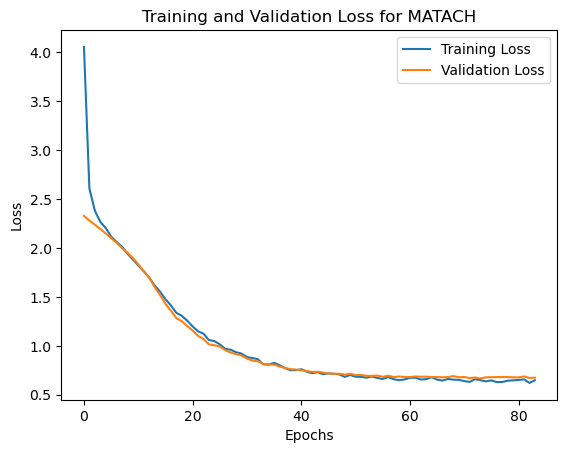

In [45]:
### 모델 실행 ####

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import streamlit as st
import joblib

# Model 1: MATACH 예측
# 독립변수와 종속변수 분리
X = data.drop(columns=['MATACH'])
y = data['MATACH']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 스케일링
scaler_X1 = StandardScaler()
scaler_y1 = StandardScaler()

X_train_scaled = scaler_X1.fit_transform(X_train)
X_test_scaled = scaler_X1.transform(X_test)
y_train_scaled = scaler_y1.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y1.transform(y_test.values.reshape(-1, 1))

# 모델 구축
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1)
])

# 모델 컴파일
model1.compile(optimizer='adam', loss='mse')

# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 훈련
history1 = model1.fit(X_train_scaled, y_train_scaled, epochs=1000, validation_split=0.3, callbacks=[early_stopping])

# Loss 값 그래프화
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for MATACH')
plt.legend()
plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 1 RMSE: 0.7345756074271259
Model 1 R²: 0.41504515404734355


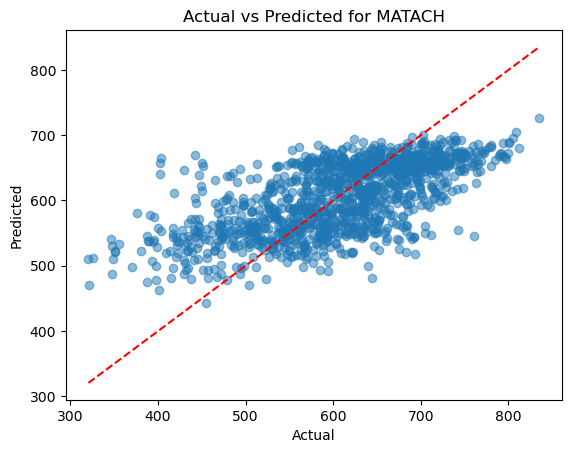

In [47]:
# 모델 평가
y_pred_scaled = model1.predict(X_test_scaled)

# RMSE 계산
rmse1 = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'Model 1 RMSE: {rmse1}')

# R² 계산
r2_1 = r2_score(y_test_scaled, y_pred_scaled)
print(f'Model 1 R²: {r2_1}')

# 예측값 역표준화
y_pred = scaler_y1.inverse_transform(y_pred_scaled)

# 예측값과 실제값 시각화
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for MATACH')
plt.show()

In [49]:
# 모델 직렬화 및 저장
model1_serialized = model1.to_json()  # 모델 아키텍처 직렬화
model1_weights = model1.get_weights()  # 모델 가중치 저장

# 직렬화된 모델 및 가중치를 함께 저장
joblib.dump((model1_serialized, model1_weights), './models/model1.pkl')

# 스케일러 저장
joblib.dump(scaler_X1, './models/scaler_X.pkl')
joblib.dump(scaler_y1, './models/scaler_y.pkl')

['./models/scaler_y.pkl']

Epoch 1/1000


C:\Users\namch\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.4392 - val_loss: 2.2951
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9631 - val_loss: 2.2189
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5067 - val_loss: 2.1736
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4586 - val_loss: 2.1346
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3204 - val_loss: 2.0908
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2617 - val_loss: 2.0461
Epoch 7/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1500 - val_loss: 1.9986
Epoch 8/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0406 - val_loss: 1.9464
Epoch 9/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9787 - val_loss: 1.8940
Epoch 10/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9203 - val_loss: 1.8394
Epoch 11/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8974 - val_loss: 1.7894
Epoch 12/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.79

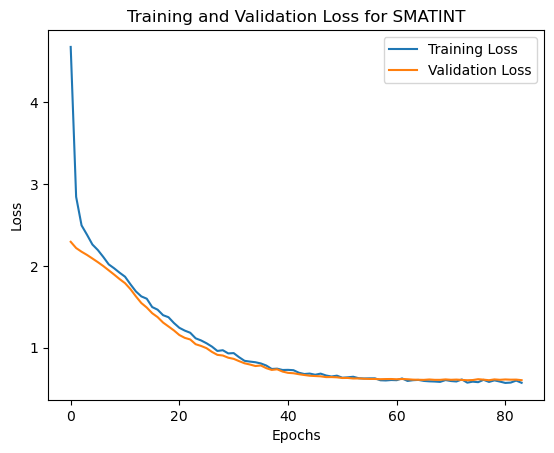

In [51]:
# Model 2: SMATINT 예측
# 독립변수와 종속변수 분리
W = data.drop(columns=['SMATINT'])
z = data['SMATINT']

# 데이터 분할
W_train, W_test, z_train, z_test = train_test_split(W, z, test_size=0.3, random_state=42)

# 스케일링
scaler_W = StandardScaler()
scaler_z = StandardScaler()

W_train_scaled = scaler_W.fit_transform(W_train)
W_test_scaled = scaler_W.transform(W_test)
z_train_scaled = scaler_z.fit_transform(z_train.values.reshape(-1, 1))
z_test_scaled = scaler_z.transform(z_test.values.reshape(-1, 1))

# 모델 구축
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(W_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1)
])

# 모델 컴파일
model2.compile(optimizer='adam', loss='mse')

# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 훈련
history2 = model2.fit(W_train_scaled, z_train_scaled, epochs=1000, validation_split=0.3, callbacks=[early_stopping])

# Loss 값 그래프화
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for SMATINT')
plt.legend()
plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 2 RMSE: 0.7031943265692131
Model 2 R²: 0.49721657713334677


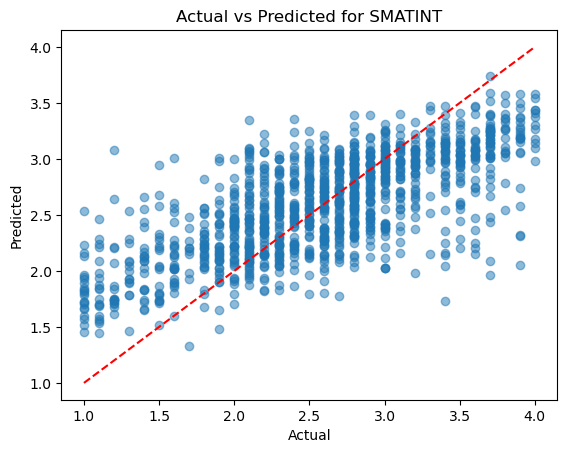

In [41]:
# 모델 평가
z_pred_scaled = model2.predict(W_test_scaled)

# RMSE 계산
rmse2 = np.sqrt(mean_squared_error(z_test_scaled, z_pred_scaled))
print(f'Model 2 RMSE: {rmse2}')

# R² 계산
r2_2 = r2_score(z_test_scaled, z_pred_scaled)
print(f'Model 2 R²: {r2_2}')

# 예측값 역표준화
z_pred = scaler_z.inverse_transform(z_pred_scaled)

# 예측값과 실제값 시각화
plt.figure()
plt.scatter(z_test, z_pred, alpha=0.5)
plt.plot([z_test.min(), z_test.max()], [z_test.min(), z_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for SMATINT')
plt.show()

In [43]:
# 모델 직렬화 및 저장
model2_serialized = model2.to_json()  # 모델 아키텍처 직렬화
model2_weights = model2.get_weights()  # 모델 가중치 저장

# 직렬화된 모델 및 가중치를 함께 저장
joblib.dump((model2_serialized, model2_weights), './models/model2.pkl')

# 스케일러 저장
joblib.dump(scaler_W, './models/scaler_W.pkl')
joblib.dump(scaler_z, './models/scaler_z.pkl')

['./models/scaler_z.pkl']

Epoch 1/1000


C:\Users\namch\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.6950 - val_loss: 2.3219
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7546 - val_loss: 2.2562
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4067 - val_loss: 2.2103
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3123 - val_loss: 2.1624
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1868 - val_loss: 2.1132
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1611 - val_loss: 2.0674
Epoch 7/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0348 - val_loss: 2.0188
Epoch 8/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9892 - val_loss: 1.9677
Epoch 9/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8935 - val_loss: 1.9097
Epoch 10/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8915 - val_loss: 1.8551
Epoch 11/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7790 - val_loss: 1.7897
Epoch 12/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.73

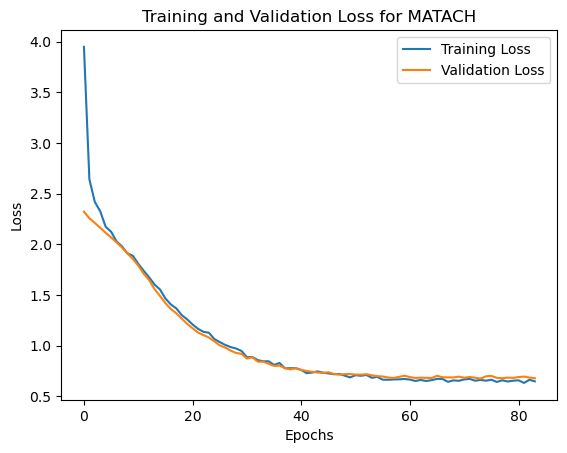

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 1 RMSE: 0.7320939353645957
Model 1 R²: 0.4189908716779551


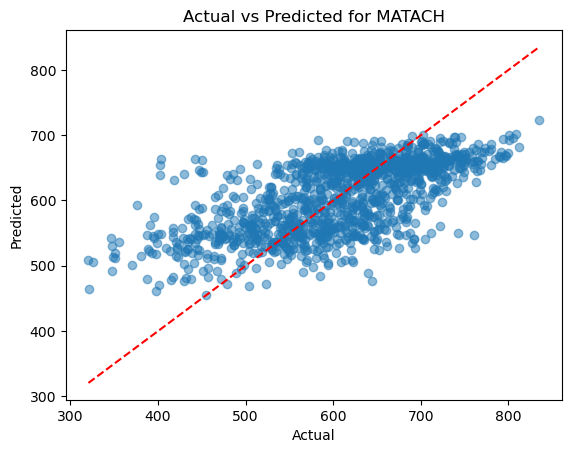

Epoch 1/1000


C:\Users\namch\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.4113 - val_loss: 2.2997
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7079 - val_loss: 2.2236
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4244 - val_loss: 2.1719
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3263 - val_loss: 2.1197
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1952 - val_loss: 2.0693
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1228 - val_loss: 2.0165
Epoch 7/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0515 - val_loss: 1.9607
Epoch 8/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9852 - val_loss: 1.9013
Epoch 9/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9084 - val_loss: 1.8379
Epoch 10/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8095 - val_loss: 1.7708
Epoch 11/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7877 - val_loss: 1.6823
Epoch 12/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.67

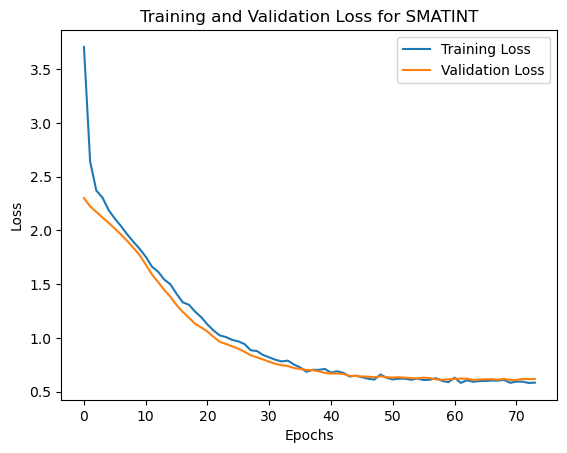

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 2 RMSE: 0.7074048814487518
Model 2 R²: 0.49117746349478963


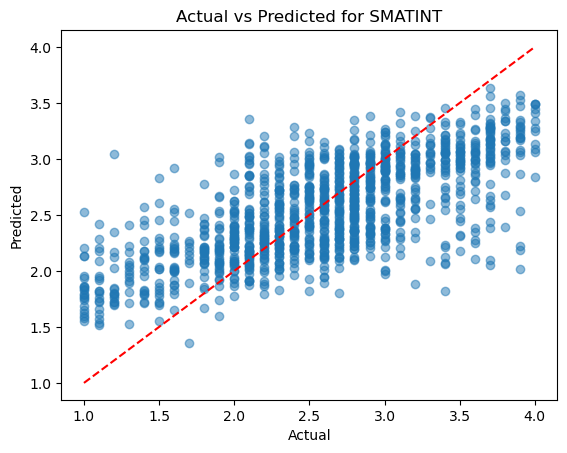

Scaled input: [[ 9.96887421e-01 -3.13629559e-01  3.06705545e+00  5.86988638e-01
   1.39768379e+00  8.08848735e-01 -5.76247475e-01 -1.48466075e+00
   2.55095632e+01 -9.15889460e-01  5.97754771e-01  2.36997161e+00
  -2.38762771e+00 -1.12175134e+00  5.38910384e-01 -3.14739444e+00
  -2.29961288e+00 -1.55608770e+00 -4.43358595e-01 -1.44657984e-01
  -1.85858243e+00 -1.01500695e+00 -7.53770173e-01 -2.83393658e+00
  -3.05588604e+00 -2.88144705e+00 -2.82981918e+00 -1.30119061e+00
  -4.52686287e-01  1.24027812e+00 -1.20868004e-01  1.66123854e+00
   2.31745210e+00 -1.93132203e-01 -3.28586881e-01 -3.15326455e+00
  -2.82846880e+00 -2.74672868e+00 -4.31699566e+00 -5.39296439e+00
  -1.61125568e-01 -2.92687739e+00  1.24794297e-01  7.99821637e-01
  -2.55424069e-01  5.86956943e+00 -6.77790298e-01 -5.04938182e+00
  -1.99435223e+00  2.10625539e+00  1.58632434e-01 -2.56895885e-02
   1.11637938e+00  2.72062672e-01  2.63568806e-02  9.95251220e+00
  -8.38629552e-01 -1.45941026e+00  1.67420192e+00 -1.66216405e

In [19]:
########## 예측값 반환 테스팅 코드 ############


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


# Model 1: MATACH 예측
# 독립변수와 종속변수 분리
X = data.drop(columns=['MATACH'])
y = data['MATACH']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 스케일링
scaler_X1 = StandardScaler()
scaler_y1 = StandardScaler()

X_train_scaled = scaler_X1.fit_transform(X_train)
X_test_scaled = scaler_X1.transform(X_test)
y_train_scaled = scaler_y1.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y1.transform(y_test.values.reshape(-1, 1))

# 모델 구축
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1)
])

# 모델 컴파일
model1.compile(optimizer='adam', loss='mse')

# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 훈련
history1 = model1.fit(X_train_scaled, y_train_scaled, epochs=1000, validation_split=0.3, callbacks=[early_stopping])

# Loss 값 그래프화
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for MATACH')
plt.legend()
plt.show()

# 모델 평가
y_pred_scaled = model1.predict(X_test_scaled)

# RMSE 계산
rmse1 = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'Model 1 RMSE: {rmse1}')

# R² 계산
r2_1 = r2_score(y_test_scaled, y_pred_scaled)
print(f'Model 1 R²: {r2_1}')

# 예측값 역표준화
y_pred = scaler_y1.inverse_transform(y_pred_scaled)

# 예측값과 실제값 시각화
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for MATACH')
plt.show()

# Model 2: SMATINT 예측
# 독립변수와 종속변수 분리
W = data.drop(columns=['SMATINT'])
z = data['SMATINT']

# 데이터 분할
W_train, W_test, z_train, z_test = train_test_split(W, z, test_size=0.3, random_state=42)

# 스케일링
scaler_W = StandardScaler()
scaler_z = StandardScaler()

W_train_scaled = scaler_W.fit_transform(W_train)
W_test_scaled = scaler_W.transform(W_test)
z_train_scaled = scaler_z.fit_transform(z_train.values.reshape(-1, 1))
z_test_scaled = scaler_z.transform(z_test.values.reshape(-1, 1))

# 모델 구축
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(W_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1)
])

# 모델 컴파일
model2.compile(optimizer='adam', loss='mse')

# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 훈련
history2 = model2.fit(W_train_scaled, z_train_scaled, epochs=1000, validation_split=0.3, callbacks=[early_stopping])

# Loss 값 그래프화
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for SMATINT')
plt.legend()
plt.show()

# 모델 평가
z_pred_scaled = model2.predict(W_test_scaled)

# RMSE 계산
rmse2 = np.sqrt(mean_squared_error(z_test_scaled, z_pred_scaled))
print(f'Model 2 RMSE: {rmse2}')

# R² 계산
r2_2 = r2_score(z_test_scaled, z_pred_scaled)
print(f'Model 2 R²: {r2_2}')

# 예측값 역표준화
z_pred = scaler_z.inverse_transform(z_pred_scaled)

# 예측값과 실제값 시각화
plt.figure()
plt.scatter(z_test, z_pred, alpha=0.5)
plt.plot([z_test.min(), z_test.max()], [z_test.min(), z_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for SMATINT')
plt.show()

# 사용자 입력을 받아 예측값을 반환하는 함수
def check_missing_values(df):
    if df.isnull().values.any():
        raise ValueError("입력 데이터에 누락된 값이 있습니다.")

def predict_with_input(model, scaler_X, scaler_y, input_data, columns):

    input_df = pd.DataFrame([input_data], columns=columns)
    check_missing_values(input_df)
    
    # Ensure the input data is correctly scaled
    input_scaled = scaler_X.transform(input_df)
    print(f"Scaled input: {input_scaled}")

    prediction_scaled = model.predict(input_scaled)
    print(f"Scaled prediction: {prediction_scaled}")

    prediction = scaler_y.inverse_transform(prediction_scaled)

    return prediction[0]

# 예시 사용자 입력 데이터
input_data = {
    'MATACH': 500,
    'SCHKOR': 3,
    'SCHPOP': 5,
    'SCHPOOR': 1,
    'SGENDER': 1,
    'SGAREDU': 5.5,
    'SEDUASPR': 8,
    'SMATINT': 3,
    'SMATEFF': 3,
    'STCHRCAP': 3,
    'TCAREER': 10,
    'TGENDER': 0,
    'TAGE': 30,
    'TMAJMATH': 0,
    'TMAJME': 1,
    'TSTUTEXP': 5,
    'TSTUPEXP': 2,
    'TSTUSEXP': 3,
    'TSTUCAP': 4,
    'TSTURES': 1,
    'TCOLLAB': 2,
    'TSATIS': 2,
    'TPASSION': 3,
    'TCRWD': 3,
    'TOVERADM': 2,
    'TPDMCP': 1,
    'TPDMCF': 1,
    'TPDMDP': 0,
    'TPDMDF': 0,
    'TPDMEP': 0,
    'TPDMEF': 0,
    'TPDSVP': 1,
    'TPDSVF': 1,
    'TPDTIME': 5,
    'TSTUPC': 28,
    'TLACKK': 3,
    'TLACKI': 3,
    'TMTIME': 700,
    'TPRIK1': 1,
    'TPRIK2': 1,
    'TPRIK3': 0,
    'TPRIK4': 0,
    'TPRIK5': 0,
    'TPRIK6': 0,
    'TPRIK7': 1,
    'TPRIK8': 1,
    'TPRIK9': 1,
    'TPRIK10': 1,
    'TPRIK11': 2,
    'TPRIK12': 1,
    'TPRIK13': 2,
    'TPRIK14': 0,
    'TPRIK15': 0,
    'TPRIK16': 0,
    'TPRIK17': 2,
    'TPRIK18': 1,
    'TPRIK19': 1,
    'TPRIK20': 1,
    'TPRIK21': 2,
    'TPRIK22': 1,
    'TINSSTG1': 2,
    'TINSSTG2': 1,
    'TINSSTG3': 4,
    'TINSSTG4': 1,
    'TINSSTG5': 3,
    'TINSSTG6': 4,
    'TINSSTG7': 3,
    'TINSASK1': 1,
    'TINSASK2': 1,
    'TINSASK3': 3,
    'TINSASK4': 2,
    'TINSASK5': 1,
    'TINSASK6': 1,
    'TINSASK7': 2,
    'TINSASK8': 5,
    'THWFRQ': 5,
    'THWTIME': 4,
    'THWSTG1': 1,
    'THWSTG2': 2,
    'THWSTG3': 2,
    'THWSTG4': 3,
    'THWSTG5': 3,
    'THWSTG6': 1,
    'THWSTG7': 3,
    'THWSTG8': 3,
    'THWSTG9': 1,
    'THWSTG10': 3
}

# Model 1 예측: MATACH를 제외한 입력 데이터 사용
input_data_model1 = {k: v for k, v in input_data.items() if k != 'MATACH'}
prediction_model1 = predict_with_input(model1, scaler_X1, scaler_y1, input_data_model1, X.columns)
print("Model 1 Prediction (MATACH):", prediction_model1)

# Model 2 예측: SMATINT를 제외한 입력 데이터 사용
input_data_model2 = {k: v for k, v in input_data.items() if k != 'SMATINT'}
prediction_model2 = predict_with_input(model2, scaler_W, scaler_z, input_data_model2, W.columns)
print("Model 2 Prediction (SMATINT):", prediction_model2)


#### 여기는 모델 저장 안함 ###########
###### 구조파악 목적 ##################

In [16]:
### 부분 최적화 값 코드 테스트 ####
### 교육전략 외 변수 고정 ####

from tensorflow.keras.optimizers import Adam

# 최적화를 위한 변수 목록
variables_to_optimize = [
    'TINSSTG1', 'TINSSTG2', 'TINSSTG3', 'TINSSTG4', 'TINSSTG5', 'TINSSTG6', 'TINSSTG7',
    'TINSASK1', 'TINSASK2', 'TINSASK3', 'TINSASK4', 'TINSASK5', 'TINSASK6', 'TINSASK7', 'TINSASK8',
    'THWFRQ', 'THWTIME', 'THWSTG1', 'THWSTG2', 'THWSTG3', 'THWSTG4', 'THWSTG5', 'THWSTG6', 'THWSTG7', 'THWSTG8', 'THWSTG9', 'THWSTG10'
]

# Model 1 최적화: MATACH를 대상으로
input_data_df_model1 = pd.DataFrame([input_data_model1], columns=X.columns)
input_data_scaled_model1 = scaler_X1.transform(input_data_df_model1)
optimize_indices_model1 = [X.columns.get_loc(var) for var in variables_to_optimize]

optimal_input_scaled_model1 = tf.Variable(input_data_scaled_model1.copy(), dtype=tf.float32)
optimizer_model1 = Adam(learning_rate=0.01)

@tf.function
def optimize_step_model1():
    with tf.GradientTape() as tape:
        prediction = model1(optimal_input_scaled_model1, training=False)
        loss = -prediction  # maximize prediction by minimizing negative prediction
    gradients = tape.gradient(loss, [optimal_input_scaled_model1])[0]
    updates = tf.zeros_like(optimal_input_scaled_model1)
    for i in optimize_indices_model1:
        updates = tf.tensor_scatter_nd_update(updates, [[0, i]], [gradients[0, i]])
    optimizer_model1.apply_gradients(zip([updates], [optimal_input_scaled_model1]))
    return loss

iterations = 50
for i in range(iterations):
    loss = optimize_step_model1()
    if i % 10 == 0:
        print(f"Iteration {i}, Loss: {loss.numpy()}")

optimal_inputs_model1 = scaler_X1.inverse_transform(optimal_input_scaled_model1.numpy())
optimal_prediction_scaled_model1 = model1.predict(optimal_input_scaled_model1)
optimal_prediction_model1 = scaler_y1.inverse_transform(optimal_prediction_scaled_model1.reshape(-1, 1))

print(f'Optimal standardized input for MATACH: {optimal_input_scaled_model1.numpy()}')
print(f'Optimal input for MATACH: {optimal_inputs_model1}')
print(f'Optimal MATACH (standardized): {optimal_prediction_scaled_model1}')
print(f'Optimal MATACH: {optimal_prediction_model1}')

difference_scaled_model1 = optimal_input_scaled_model1.numpy() - input_data_scaled_model1
difference_model1 = optimal_inputs_model1 - input_data_df_model1.values

results_df_model1 = pd.DataFrame({
    'Feature': X.columns,
    'Original Input': np.round(input_data_df_model1.values.flatten(), 2),
    'Optimized Input': np.round(optimal_inputs_model1.flatten(), 2),
    'Difference': np.round(difference_model1.flatten(), 2)
})

pd.set_option('display.max_rows', None)
print(results_df_model1)

original_pred_value_model1 = prediction_model1
optimal_pred_value_model1 = optimal_prediction_model1[0, 0]
difference_value_model1 = optimal_pred_value_model1 - original_pred_value_model1
percentage_increase_model1 = (difference_value_model1 / original_pred_value_model1) * 100

print(f'Original Predicted MATACH Value: {original_pred_value_model1}')
print(f'Optimal Predicted MATACH Value: {optimal_pred_value_model1}')
print(f'Difference (Optimal - Original) for MATACH: {difference_value_model1}')
print(f'Percentage Increase for MATACH: {percentage_increase_model1[0]:.2f}%')

# Model 2 최적화: SMATINT를 대상으로
input_data_df_model2 = pd.DataFrame([input_data_model2], columns=W.columns)
input_data_scaled_model2 = scaler_W.transform(input_data_df_model2)
optimize_indices_model2 = [W.columns.get_loc(var) for var in variables_to_optimize]

optimal_input_scaled_model2 = tf.Variable(input_data_scaled_model2.copy(), dtype=tf.float32)
optimizer_model2 = Adam(learning_rate=0.01)

@tf.function
def optimize_step_model2():
    with tf.GradientTape() as tape:
        prediction = model2(optimal_input_scaled_model2, training=False)
        loss = -prediction  # maximize prediction by minimizing negative prediction
    gradients = tape.gradient(loss, [optimal_input_scaled_model2])[0]
    updates = tf.zeros_like(optimal_input_scaled_model2)
    for i in optimize_indices_model2:
        updates = tf.tensor_scatter_nd_update(updates, [[0, i]], [gradients[0, i]])
    optimizer_model2.apply_gradients(zip([updates], [optimal_input_scaled_model2]))
    return loss

for i in range(iterations):
    loss = optimize_step_model2()
    if i % 10 == 0:
        print(f"Iteration {i}, Loss: {loss.numpy()}")

optimal_inputs_model2 = scaler_W.inverse_transform(optimal_input_scaled_model2.numpy())
optimal_prediction_scaled_model2 = model2.predict(optimal_input_scaled_model2)
optimal_prediction_model2 = scaler_z.inverse_transform(optimal_prediction_scaled_model2.reshape(-1, 1))

print(f'Optimal standardized input for SMATINT: {optimal_input_scaled_model2.numpy()}')
print(f'Optimal input for SMATINT: {optimal_inputs_model2}')
print(f'Optimal SMATINT (standardized): {optimal_prediction_scaled_model2}')
print(f'Optimal SMATINT: {optimal_prediction_model2}')

difference_scaled_model2 = optimal_input_scaled_model2.numpy() - input_data_scaled_model2
difference_model2 = optimal_inputs_model2 - input_data_df_model2.values

results_df_model2 = pd.DataFrame({
    'Feature': W.columns,
    'Original Input': np.round(input_data_df_model2.values.flatten(), 2),
    'Optimized Input': np.round(optimal_inputs_model2.flatten(), 2),
    'Difference': np.round(difference_model2.flatten(), 2)
})

print(results_df_model2)

original_pred_value_model2 = prediction_model2
optimal_pred_value_model2 = optimal_prediction_model2[0, 0]
difference_value_model2 = optimal_pred_value_model2 - original_pred_value_model2
percentage_increase_model2 = (difference_value_model2 / original_pred_value_model2) * 100

print(f'Original Predicted SMATINT Value: {original_pred_value_model2}')
print(f'Optimal Predicted SMATINT Value: {optimal_pred_value_model2}')
print(f'Difference (Optimal - Original) for SMATINT: {difference_value_model2}')
print(f'Percentage Increase for SMATINT: {percentage_increase_model2[0]:.2f}%')

Iteration 0, Loss: [[-0.56887925]]
Iteration 10, Loss: [[-0.60133904]]
Iteration 20, Loss: [[-0.6286456]]
Iteration 30, Loss: [[-0.6544901]]
Iteration 40, Loss: [[-0.67830175]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Optimal standardized input for MATACH: [[ 0.99688745 -0.31362957  3.0670555   0.5869886   1.3976837   0.80884874
  -0.57624745 -1.4846607  25.509563   -0.91588944  0.5977548   2.3699715
  -2.3876276  -1.1217513   0.5389104  -3.1473944  -2.2996128  -1.5560877
  -0.4433586  -0.14465798 -1.8585824  -1.0150069  -0.7537702  -2.8339367
  -3.055886   -2.881447   -2.8298192  -1.3011906  -0.45268628  1.2402781
  -0.120868    1.6612386   2.3174522  -0.1931322  -0.32858688 -3.1532645
  -2.8284688  -2.7467287  -4.3169956  -5.3929644  -0.16112557 -2.9268775
   0.1247943   0.7998216  -0.25542408  5.8695693  -0.6777903  -5.0493817
  -1.9943522   2.1062553   0.15863243 -0.02568959  1.1163794   0.27206266
   0.02635688  9.952512   -0.76156306 -1.9528904   1.7871195  -2.1391997
  -0.09769336 

In [ ]:
### 아래서부터는 중요도 변수 알려주는 계산 ###

Using 600 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1238 [00:00<?, ?it/s]

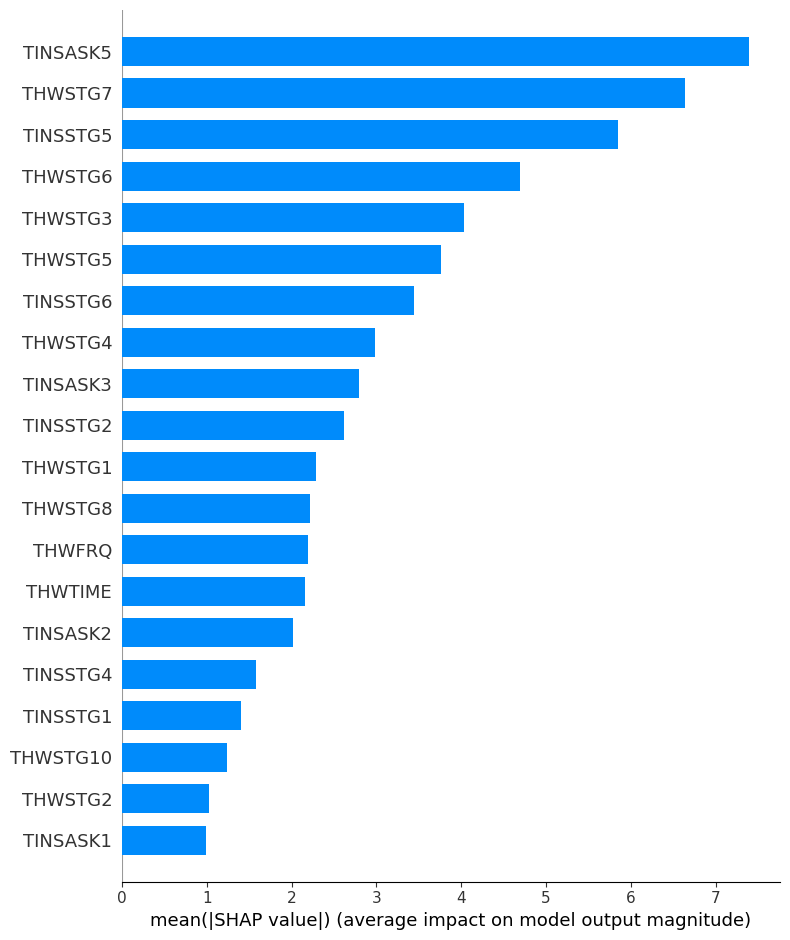

In [7]:
### model1 shap value #####

import pandas as pd
from sklearn.linear_model import LassoLars
import shap
from IPython.display import display

%matplotlib inline

shap.initjs()

# 특정 변수 목록
selected_features = [
    'TINSSTG1', 'TINSSTG2', 'TINSSTG3', 'TINSSTG4', 'TINSSTG5', 'TINSSTG6', 'TINSSTG7',
    'TINSASK1', 'TINSASK2', 'TINSASK3', 'TINSASK4', 'TINSASK5', 'TINSASK6', 'TINSASK7', 'TINSASK8',
    'THWFRQ', 'THWTIME', 'THWSTG1', 'THWSTG2', 'THWSTG3', 'THWSTG4', 'THWSTG5', 'THWSTG6', 'THWSTG7', 'THWSTG8', 'THWSTG9', 'THWSTG10'
]

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# 선택된 변수만 사용
X_train_selected = X_train_scaled_df[selected_features]
X_test_selected = X_test_scaled_df[selected_features]

model = LassoLars(alpha=0.1, max_iter=100, eps=2.220446049250313e-16)

model.fit(X_train_selected, y_train)

# SHAP 값 계산 (KernelExplainer 사용)
background = shap.sample(X_train_selected, 600)  # 또는 shap.kmeans(X_train_selected, 100)
explainer = shap.KernelExplainer(model.predict, background, link="identity")
shap_values = explainer.shap_values(X_test_selected, nsamples=600)  # 샘플 수를 100으로 제한

# 2D array
if isinstance(shap_values, list):
    shap_values = shap_values[0]

# 샘플 수 제한.. 컴퓨팅 이슈 ㅠㅠ
sampled_X_test = X_test_selected.sample(600)
sampled_shap_values = shap_values[:600]

# Create a SHAP Explanation object
shap_exp = shap.Explanation(values=sampled_shap_values, base_values=explainer.expected_value, data=sampled_X_test, feature_names=sampled_X_test.columns)

# SHAP summary plot
shap.summary_plot(shap_exp, plot_type='bar')

Using 600 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1238 [00:00<?, ?it/s]

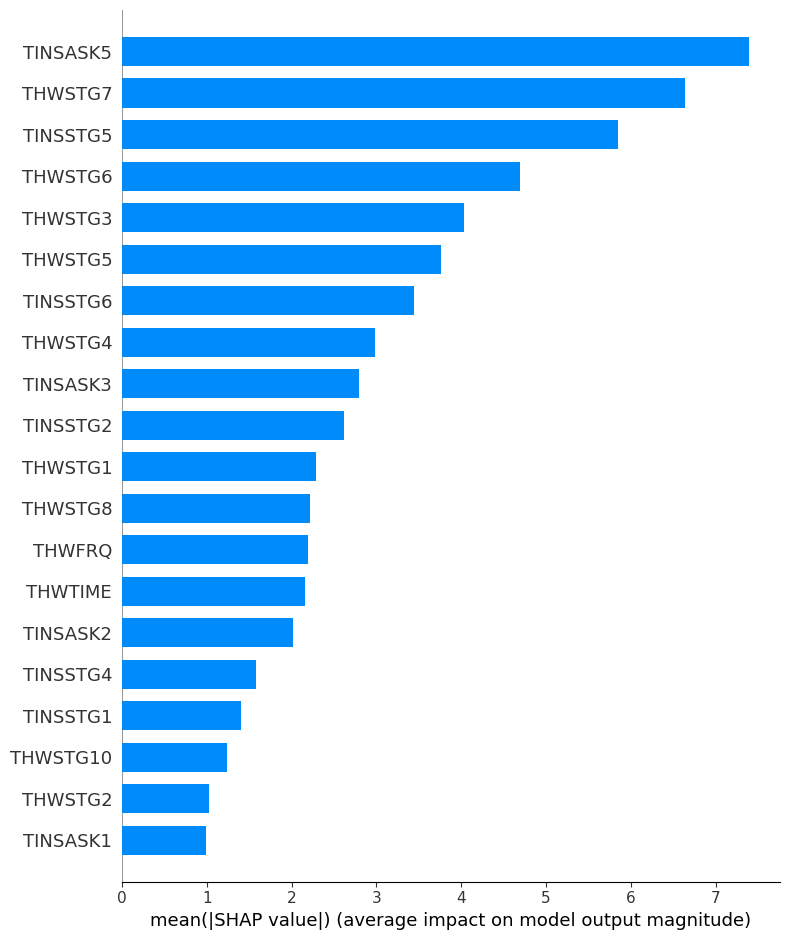

In [13]:
### model2 shap value #####

import pandas as pd
from sklearn.linear_model import LassoLars
import shap
from IPython.display import display

%matplotlib inline

shap.initjs()

# 특정 변수 목록
selected_features = [
    'TINSSTG1', 'TINSSTG2', 'TINSSTG3', 'TINSSTG4', 'TINSSTG5', 'TINSSTG6', 'TINSSTG7',
    'TINSASK1', 'TINSASK2', 'TINSASK3', 'TINSASK4', 'TINSASK5', 'TINSASK6', 'TINSASK7', 'TINSASK8',
    'THWFRQ', 'THWTIME', 'THWSTG1', 'THWSTG2', 'THWSTG3', 'THWSTG4', 'THWSTG5', 'THWSTG6', 'THWSTG7', 'THWSTG8', 'THWSTG9', 'THWSTG10'
]

W_train_scaled_df = pd.DataFrame(W_train_scaled, columns=W_train.columns)
W_test_scaled_df = pd.DataFrame(W_test_scaled, columns=W_test.columns)

# 선택된 변수만 사용
W_train_selected = W_train_scaled_df[selected_features]
W_test_selected = W_test_scaled_df[selected_features]

model2 = LassoLars(alpha=0.1, max_iter=100, eps=2.220446049250313e-16)

model2.fit(W_train_selected, z_train)

# SHAP 값 계산 (KernelExplainer 사용)
background2 = shap.sample(W_train_selected, 600)  # 또는 shap.kmeans(X_train_selected, 100)
explainer2 = shap.KernelExplainer(model2.predict, background2, link="identity")
shap_values2 = explainer.shap_values(W_test_selected, nsamples=600)  # 샘플 수를 100으로 제한

# 2D array
if isinstance(shap_values2, list):
    shap_values2 = shap_values2[0]

# 샘플 수 제한.. 컴퓨팅 이슈 ㅠㅠ
sampled_W_test = W_test_selected.sample(600)
sampled_shap_values2 = shap_values2[:600]

# Create a SHAP Explanation object
shap_exp2 = shap.Explanation(values=sampled_shap_values2, base_values=explainer.expected_value, data=sampled_W_test, feature_names=sampled_W_test.columns)

# SHAP summary plot
shap.summary_plot(shap_exp2, plot_type='bar')